In [1]:
import pandas as pd

df = pd.read_csv('superstore.csv', encoding='latin1')

#Data cleaning

In [2]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub-category   9994 n

In [9]:
obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.strip())

In [10]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#Univariate analysis (numerical columns)


statistics of sales:
count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: sales, dtype: float64

skewness of sales:
12.97275234181623

percentage of missing values inside sales:
0.0

lower bound of sales: -271.71000000000004

upper bound of sales: 498.93


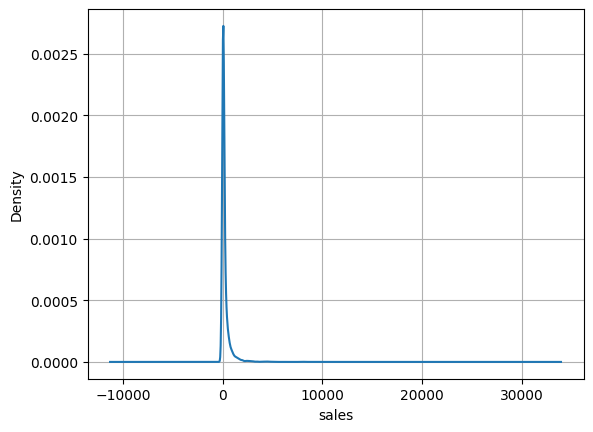

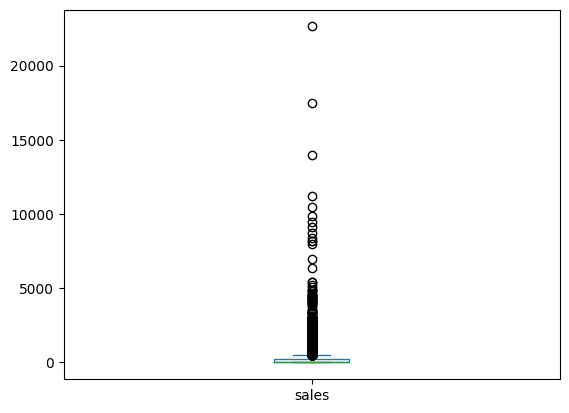


statistics of profit:
count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: profit, dtype: float64

skewness of profit:
7.561431562468343

percentage of missing values inside profit:
0.0

lower bound of profit: -39.724125

upper bound of profit: 70.816875


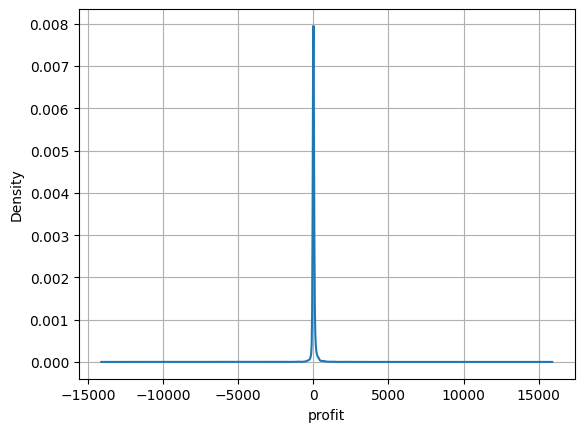

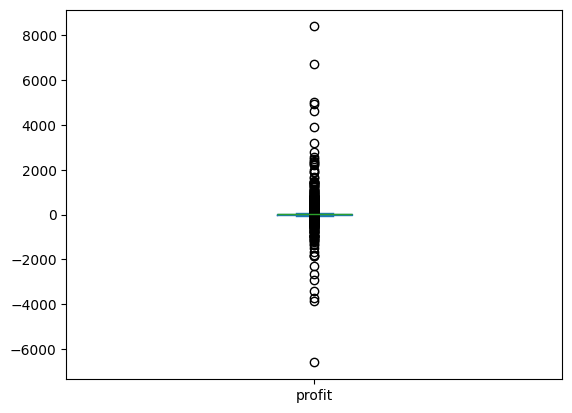


statistics of quantity:
count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: quantity, dtype: float64

skewness of quantity:
1.2785447527223421

percentage of missing values inside quantity:
0.0

lower bound of quantity: -2.5

upper bound of quantity: 9.5


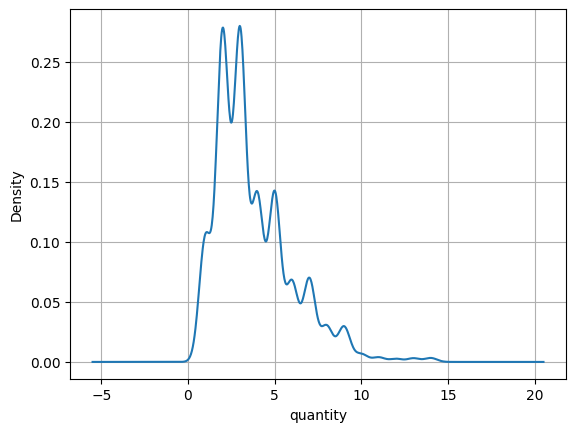

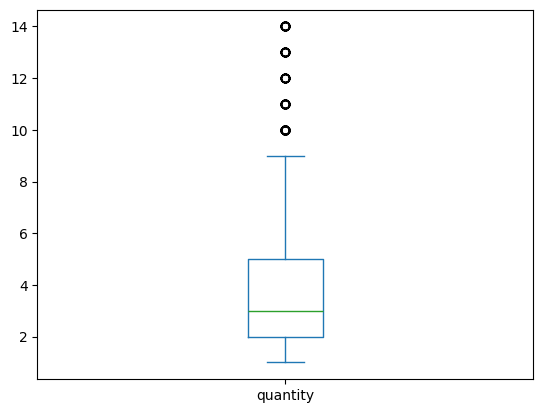


statistics of discount:
count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: discount, dtype: float64

skewness of discount:
1.6842947474238648

percentage of missing values inside discount:
0.0

lower bound of discount: -0.30000000000000004

upper bound of discount: 0.5


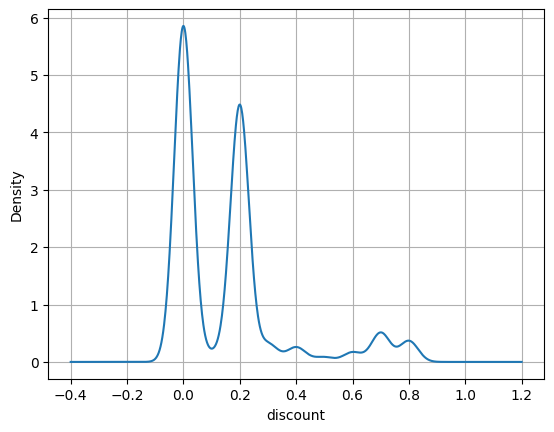

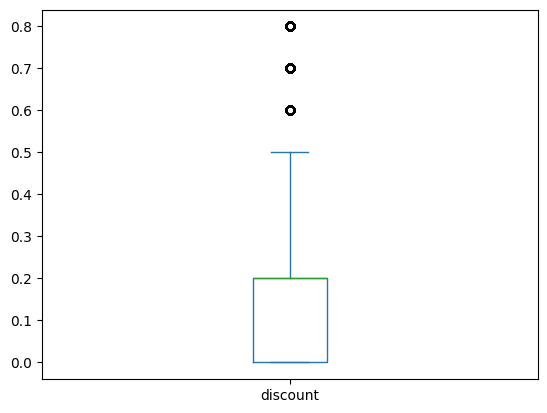

In [12]:
#numerical columns:-
num_cols = ['sales', 'profit', 'quantity', 'discount']

for col in num_cols:
  print(f"\nstatistics of {col}:")
  print(df[col].describe())
  print(f"\nskewness of {col}:")
  print(df[col].skew())
  print(f"\npercentage of missing values inside {col}:")
  print(df[col].isnull().mean())
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  print(f"\nlower bound of {col}:", lower_bound)
  print(f"\nupper bound of {col}:", upper_bound)
  df[col].plot(kind='kde')
  plt.xlabel(col)
  plt.grid(True)
  plt.show()
  df[col].plot(kind='box')
  plt.show()


#Conclusions:-

1. Sales:-

* **Data is complete**
* **Highly positively skewed**: this suggests that most of the sale transactions are of lower amounts and few are extremely high stretching the distribution on the right.
* **Presence of extreme outliers**: sales above 498.93 are considered outliers and max sales value of 22.6k suggests that there are a few very unusually large transactions
* **Mean is not a reliable measure of central tendency**: This is due to the heavy positive skewness, making median more representative of the data.
* **High variance in sales** : Due to large std, indicating wider spread of values. For modelling, log transform needed.



2. Profit:-

* **Data is complete**
* **Highly positively skewed**: this suggests that most of the profits were very small with presence of few extremely high profits and few extremely high losses
* **Presence of extreme outliers**: profits below -39.72 and above 70.81 are considered outliers. Max and min values of profits are some unusually high profits and heavy losses respectively.
* **Mean is not a reliable measure of central tendency**: This is due to the heavy positive skewness, making median more representative of the data.
* **High variance in sales** : Due to large std, indicating wider spread of values. For modelling, log transform needed.


3. Quantity:-

* **Data is complete**
* **Midly positively skewed**: While most of the orders had a lower quantity, a very few have higher quantities (for eg:- bulk orders)
* **Most common order sizes:** Median = 3 units and 75% of orders are ≤ 5 units. This indicates that small to moderately sized purchases are dominant.
* **Outliers present**: Max value of 14 exceeding upper bound of 9.5 sugests bulk buying (for eg:- wholesale customers)
* **Distribution is spread is reasonable** : Not too wide spread.

4. Discount:-

* **No missing values**
* **Mildy positively skewed**: Most items have little to no discount while only a few have high discount like that of 80% (max value)

* **Common discount tiers:** 25% percentile = 0, 50% = 0.20, 75% = 0.20. This suggests many orders had no discount, and a significant chunk had exactly 20% discount, likely a standard offer.

* **Outliers present:** With an upper bound = 0.5, the max discount of 0.8 suggest  presence of unusually higher discounts.

* **Low overall average discount (15.6%)**: Most discounts are little to none, suggesting that pricing nearly close to full pricing.


#Univariate analysis (Categorical columns)


Number of missing values in category:
0

Frequency Distribution of category:
category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


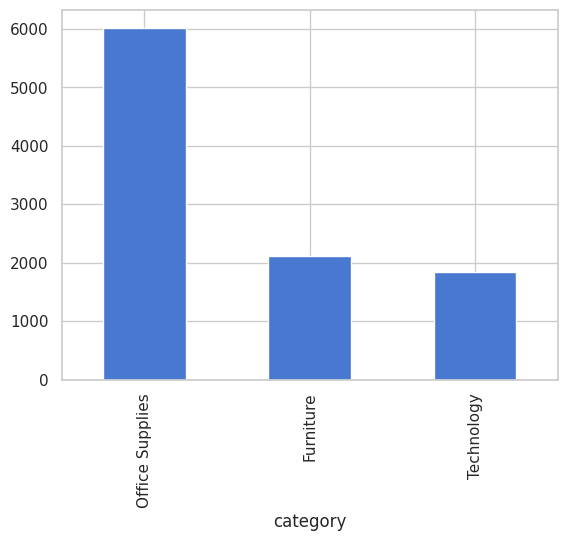

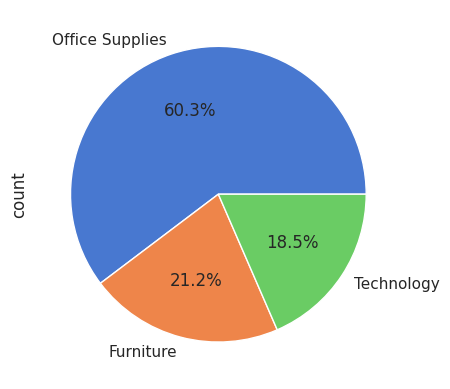


Number of missing values in sub-category:
0

Frequency Distribution of sub-category:
sub-category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


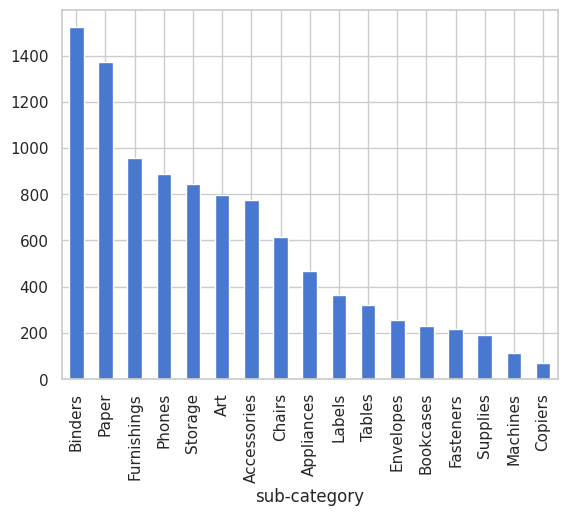

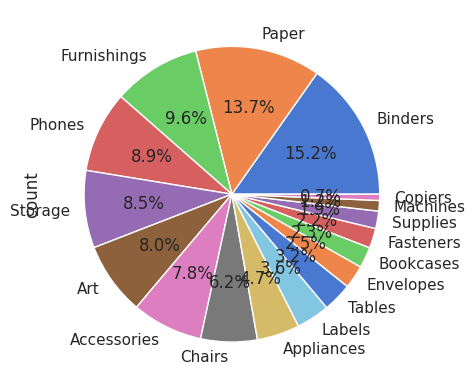


Number of missing values in segment:
0

Frequency Distribution of segment:
segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


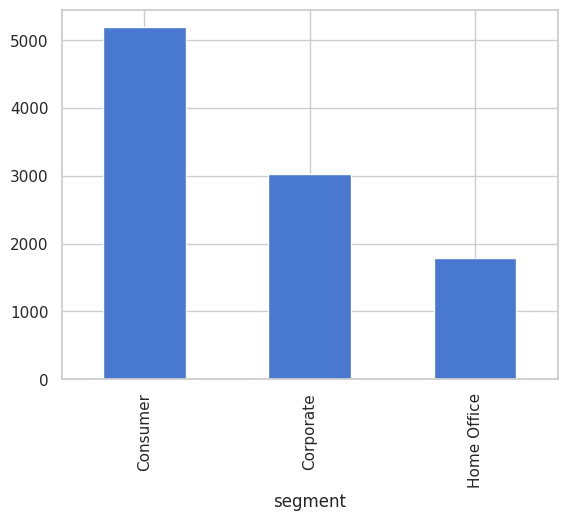

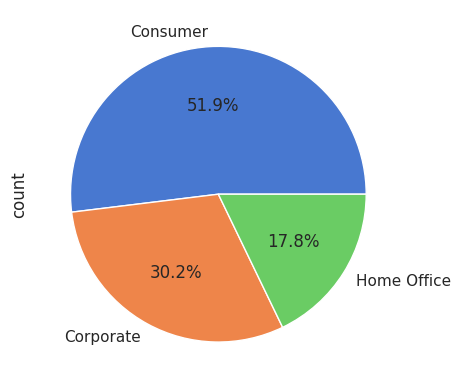


Number of missing values in region:
0

Frequency Distribution of region:
region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


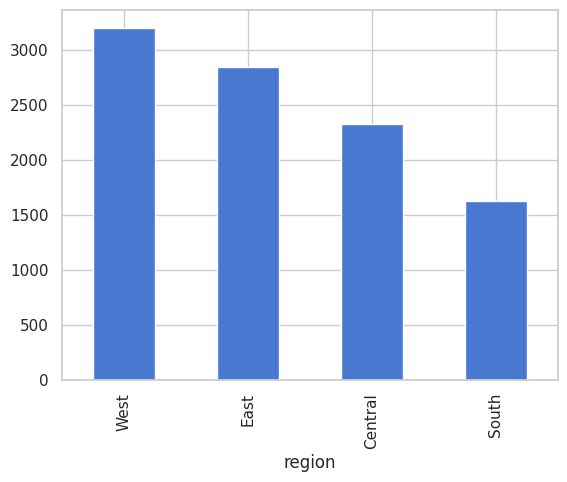

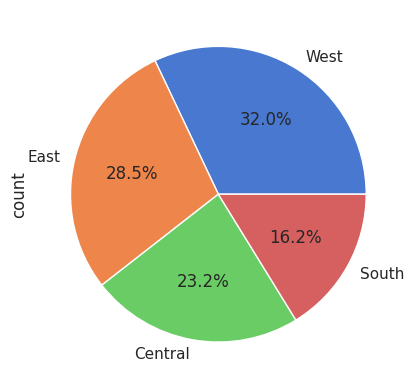


Number of missing values in ship_mode:
0

Frequency Distribution of ship_mode:
ship_mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


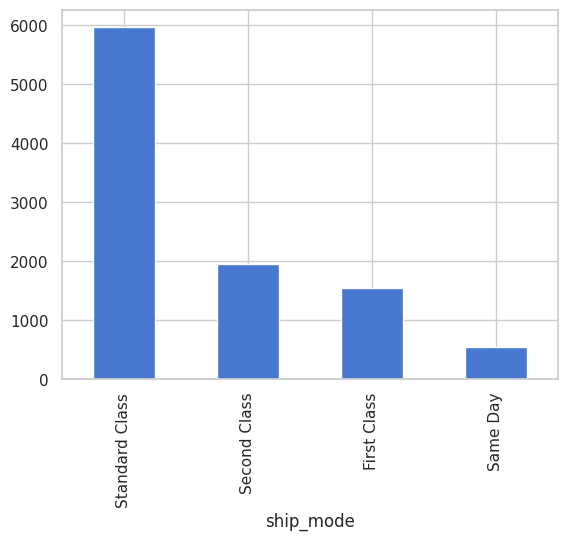

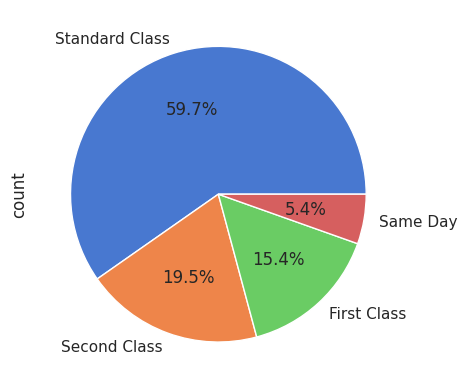

In [20]:
#categorical columns:-
cat_cols = ['category', 'sub-category', 'segment', 'region', 'ship_mode']

for col in cat_cols:
  print(f"\nNumber of missing values in {col}:")
  print(df[col].isnull().sum())
  print(f"\nFrequency Distribution of {col}:")
  print(df[col].value_counts())
  df[col].value_counts().plot(kind='bar')
  plt.show()
  df[col].value_counts().plot(kind='pie',autopct='%0.1f%%')
  plt.show()


# Conclusions:-
1. The business mainly revolves around Office Supplies, which make up the majority of the sales, followed by Furniture and Technology.
2. Binders and papers (presumably cheap and used in everyday life) are sold the most, whereas items like copiers and machines are sold rarely. This shows that some items are in high demand.
3. As most customers belong to consumer segment, it means that individual buyers are main target followed by corporate people.
4. West and East markets are seen to be most active. South is way behind maybe because of lack of service and marketing.
5. Most of the people are going for standard class delivery option because it might be available at affordable rates. Only a few opt for same day delivery, suggesting that most of the people are okay with waiting or people might be unaware that such an option (same day) exists.

#Bivariate analysis (numeric - numeric)

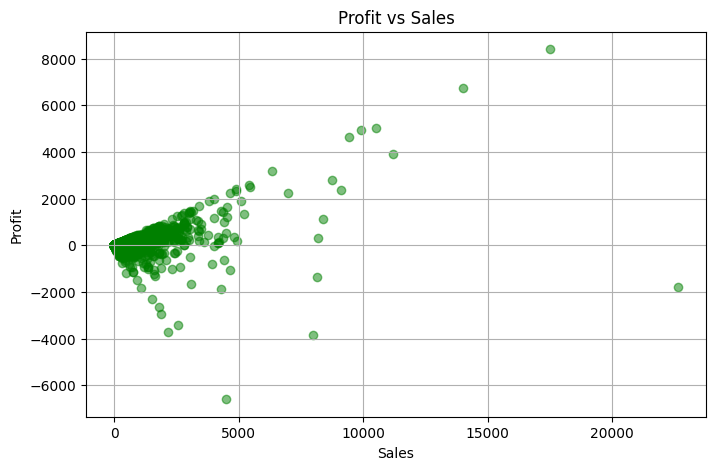

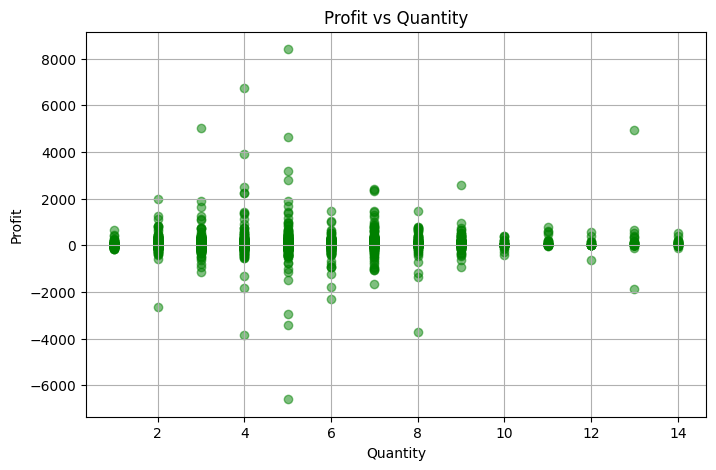

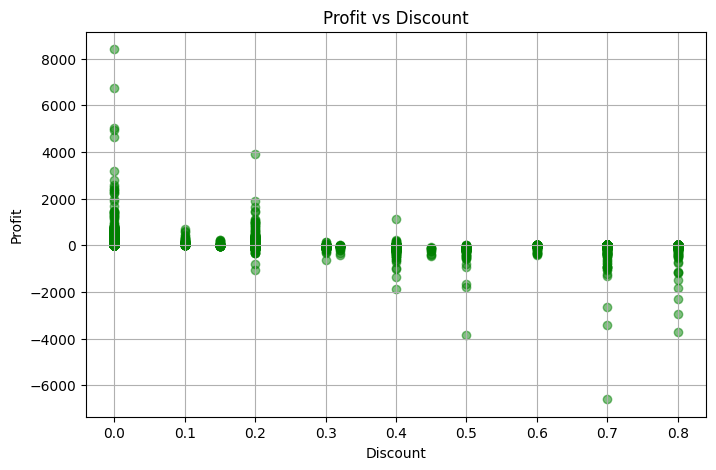

In [14]:
#target column is Profit
target = 'profit'
num_cols = ['sales', 'quantity', 'discount']

for col in num_cols:
  plt.figure(figsize=(8, 5))
  plt.scatter(df[col], df[target], alpha=0.5, color='green')
  plt.title(f'Profit vs {col.capitalize()}')
  plt.xlabel(col.capitalize())
  plt.ylabel(target.capitalize())
  plt.grid(True)
  plt.show()

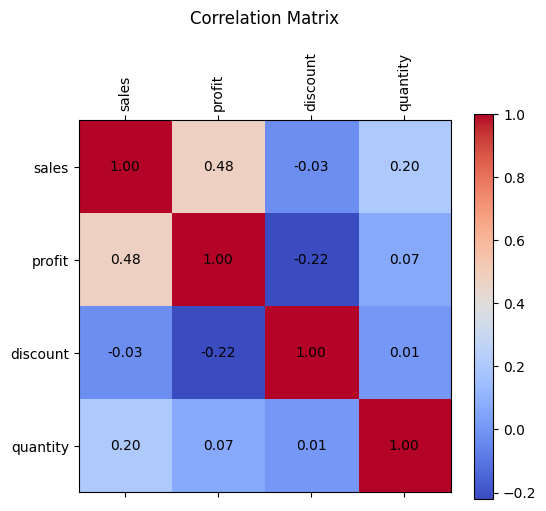

In [15]:
import numpy as np

num_cols = ['sales', 'profit', 'discount', 'quantity']
corr = df[num_cols].corr()

fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
fig.colorbar(cax)

# Annotate correlation values
for (i, j), z in np.ndenumerate(corr.values):
    ax.text(j, i, f'{z:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix', pad=20)
plt.show()


#Conclusions:-
1. **Profit vs Sales**:- There is some positive correlation between sales and profit (0.48). But this does not mean that increasing sales with necessarily lead to increase in the cummulative profits. At some points where sales are in large amounts, heavy losses are seen possibly due to high discount rates.
2. **Profit vs Quantity**:- A very weak positive correlation (0.07) suggests that increasing the quantity will not affect the cummulative profits significantly.
3. **Profit vs Discount**:- Mild negative correlation exists, suggesting more the discounts, higher the losses and lesser the profits. According to the graph, it is advisable to delimit the discount to around 40%.

#Bivariate analysis (numeric - categorical)

/tmp/ipython-input-16-2101196447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


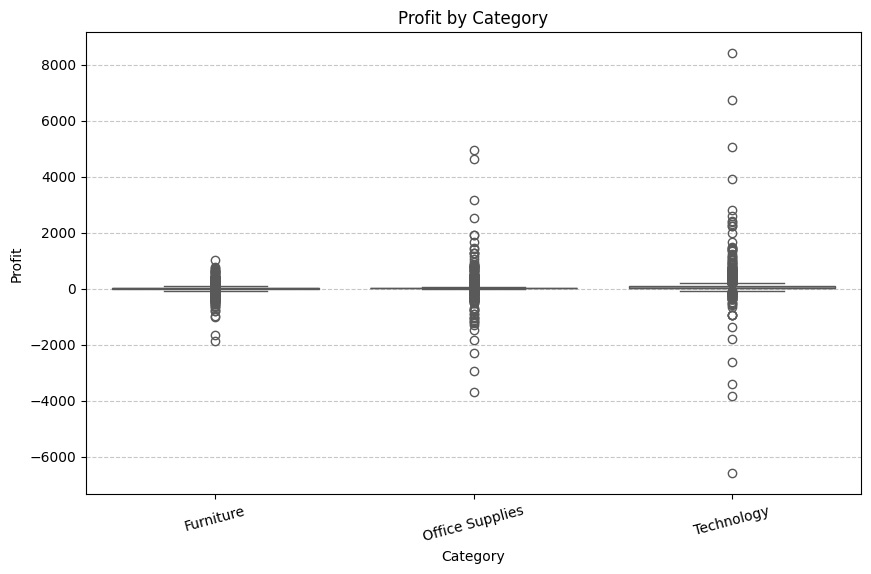

/tmp/ipython-input-16-2101196447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


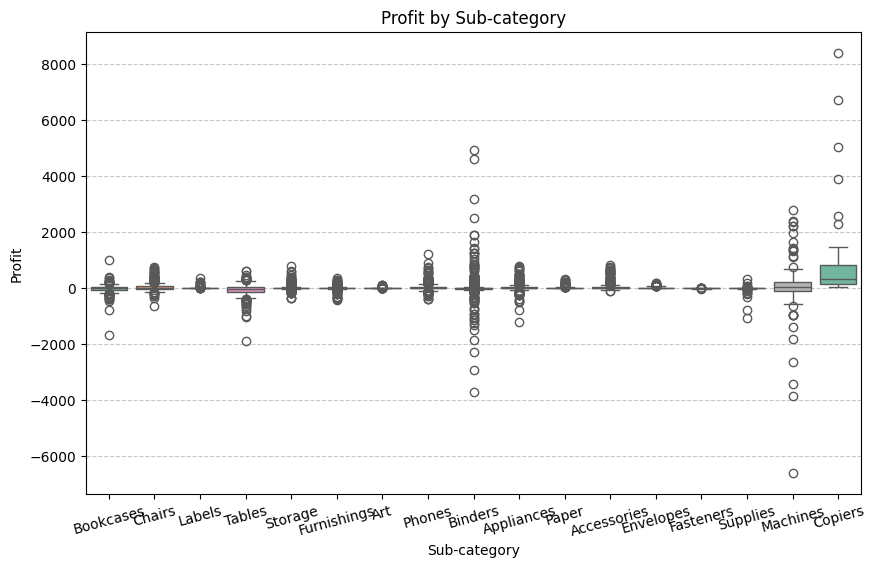

/tmp/ipython-input-16-2101196447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


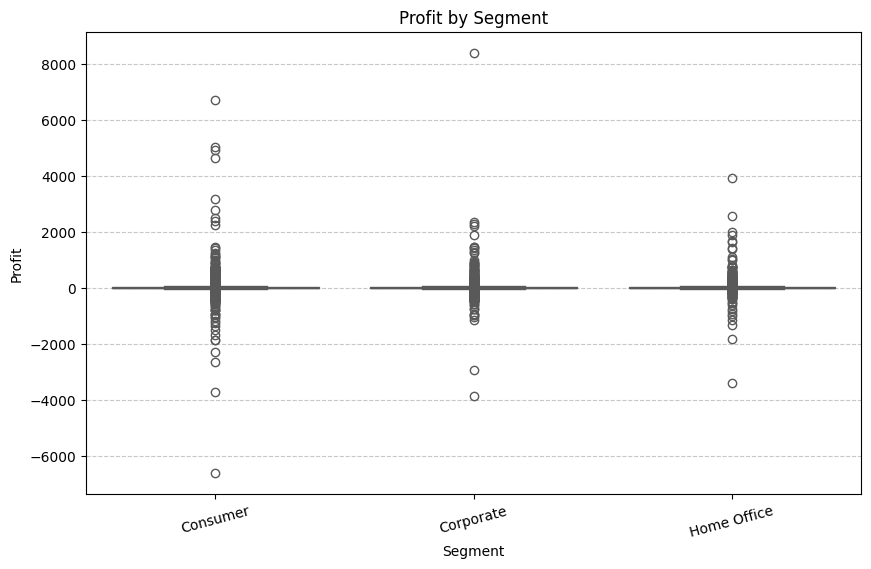

/tmp/ipython-input-16-2101196447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


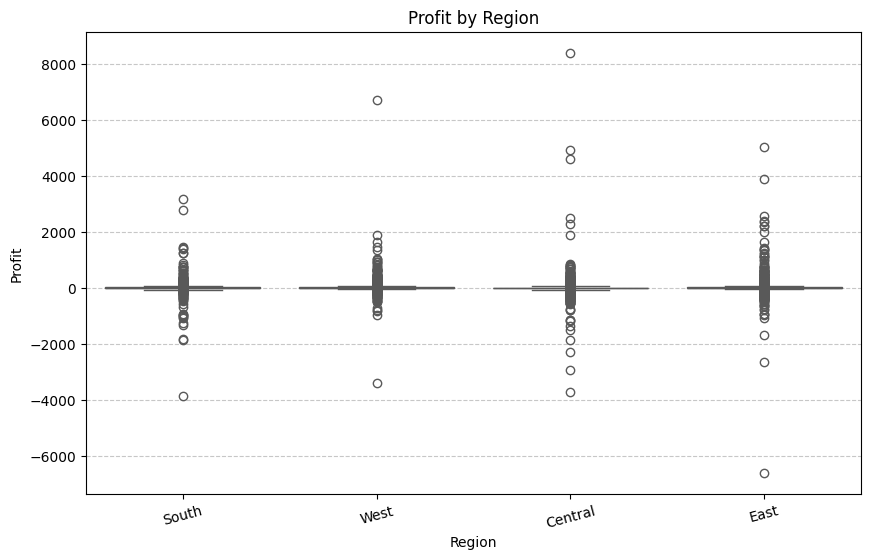

/tmp/ipython-input-16-2101196447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


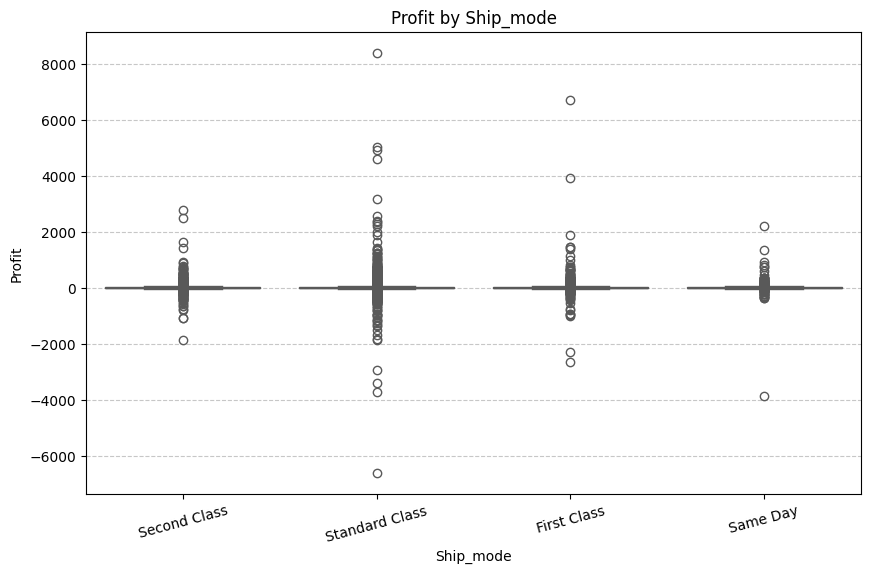

In [16]:
target = 'profit'
cat_cols = ['category', 'sub-category', 'segment', 'region', 'ship_mode']

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target, data=df, palette='Set2')
    plt.title(f'{target.capitalize()} by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel(target.capitalize())
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=15)
    plt.show()

#Conclusions:-
1. **Category vs Profit**:- Technology is the most profitable category and should be prioritized for sales and marketing. Furniture, showing negative cummulative profit, may need cost optimization or discount control.

2. **Sub-Category vs Profit**:- Focussing more on copiers, phones and accessories for revenue will bring high profit . Whereas bookcases, machines and tables need reevaluation as they incur more loss than profit.
3. **Segment vs Profit**:- Corporate and Consumers are strong segments and home office, being the least targetted, needs better targeting as even it is bring significant profit.
4. **Region vs Profit**:- East and West yield more overall profits and the company should continue putting growth efforts on such regions. The central has bought highest profit but as well as has incurred great losses too. Central and South regions needs investigation on the part of lower performance.
5. **Ship Mode vs Profit**:- Overall no such trend observed and it does not depend much on what delivery mode is being used. But, because first class and same day delivery options are cost heavy, it might hurt the margins.

#Multivariate analysis:-

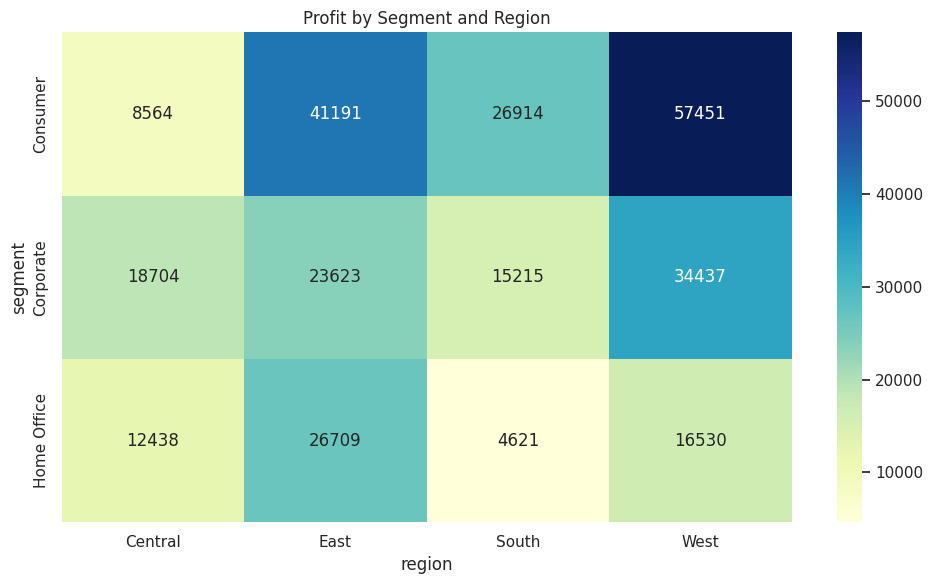

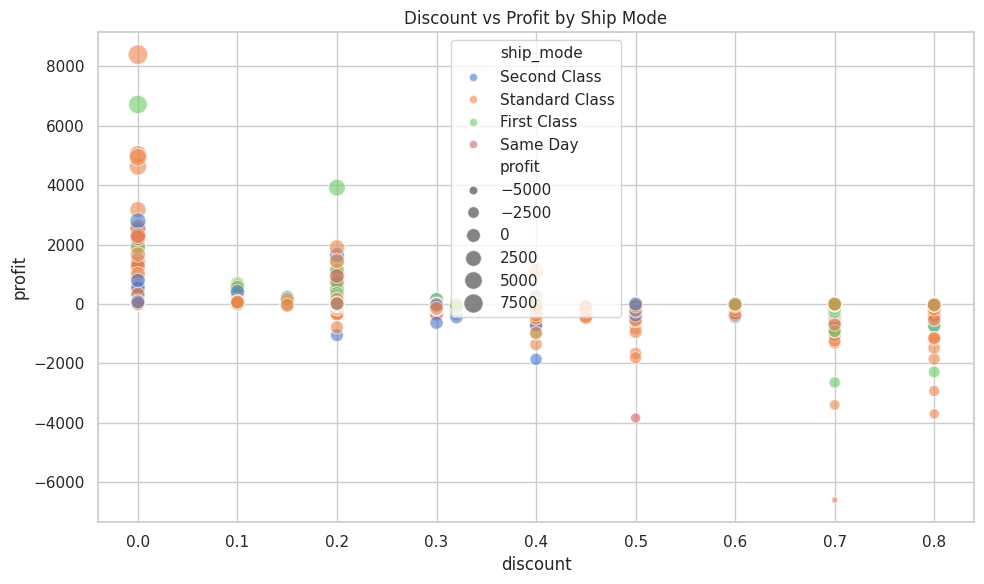

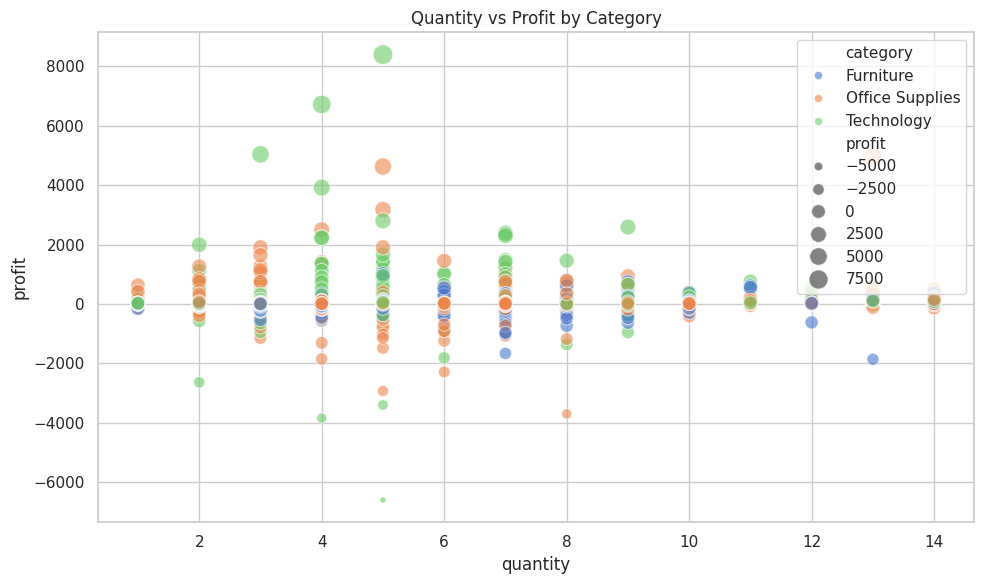

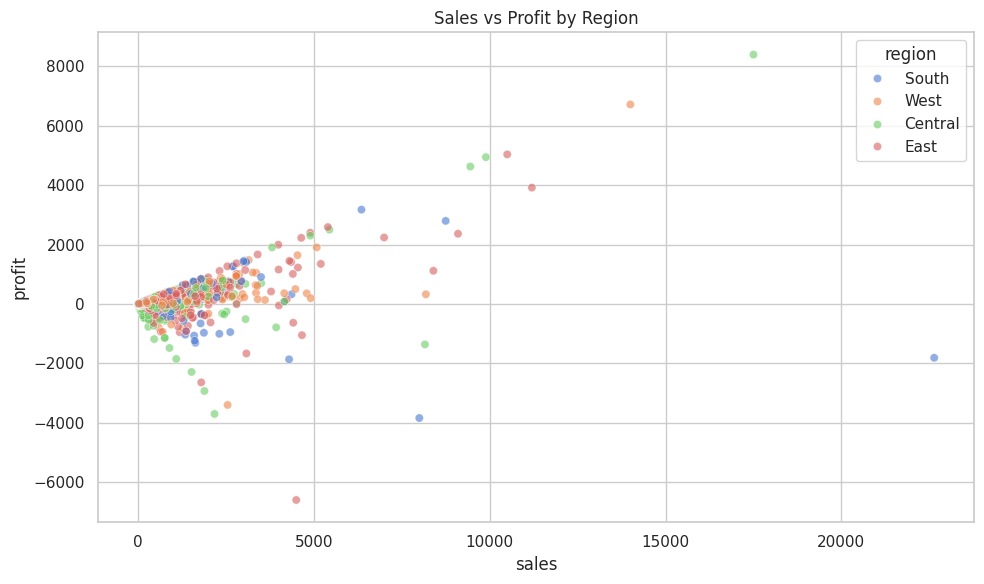

In [17]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# -------------------- 1. Segment vs Region vs Profit --------------------
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='segment', columns='region', values='profit', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Profit by Segment and Region")
plt.tight_layout()
plt.show()


# -------------------- 2. Ship Mode vs Discount vs Profit --------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="discount", y="profit", hue="ship_mode", size="profit", sizes=(20, 200), alpha=0.6)
plt.title("Discount vs Profit by Ship Mode")
plt.tight_layout()
plt.show()

# -------------------- 3. Category vs Quantity vs Profit --------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="quantity", y="profit", hue="category", size="profit", sizes=(20, 200), alpha=0.6)
plt.title("Quantity vs Profit by Category")
plt.tight_layout()
plt.show()

# -------------------- 4. Region vs Sales vs Profit --------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="sales", y="profit", hue="region", alpha=0.6)
plt.title("Sales vs Profit by Region")
plt.tight_layout()
plt.show()


#Conclusions:-
1. **Segment vs Region vs Profit**:- South and west regions have yielded the highest profits. Consumer and Corporate segments yield the highest profits. Home office segment has consistently yeilded lower profits across all the regions.
2. **Ship Mode vs Discount vs Profit**:- Discounts above 30% lessen the profitability as negative correlation is observed. There is not much influence on profitability when it comes to shipping mode, and hence focussing more on discount policies will help.
3. **Category vs Quantity vs Profit**:- Technology has yielded higher profits consistently across many different quantity orders. It has also incurred losses, though not as high as the profits. Office supplies has shown moderate profit and loss. Furniture throughout has shown lesser profits and losses.
4. **Region vs Sales vs Profit**:- South and central regions have shown tight clustering at low sales, showing lesser variability with more losses incurred than the profits. West and East show higher variability with more overall profit than loss.


In [21]:
df.to_csv('cleaned_superstore.csv', index=False)